In [2]:
import torch
import numpy as np
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l
import matplotlib.pyplot as plt

In [3]:
n_train, n_test, true_w, true_b = 200, 100, [1.2, -3.4, 5.6], 5

features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [4]:
print(poly_features.shape)
print(labels.shape)

torch.Size([300, 3])
torch.Size([300])


In [7]:
num_epochs, loss = 100, torch.nn.MSELoss()

In [8]:
train_ls, test_ls = [], []
def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # 通过Linear文档可知，pytorch已经将参数初始化了，所以我们这里就不手动初始化了

    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())

    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data)


final epoch: train loss 1.453319787979126 test loss 589.9155883789062


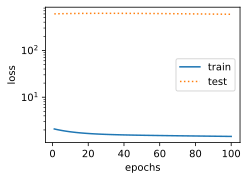

weight: tensor([[ 0.2797, -0.4671,  0.4795]]) 
bias: tensor([0.3889])


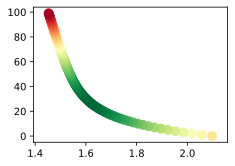

In [9]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])
plt.scatter(train_ls, range(num_epochs), s=100, c=test_ls, lw=0, cmap='RdYlGn')
plt.show()